## Import

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
from ML.utils.utils import *
from ML.utils.Data_preparator import Data_preparator
from ML.utils.Model_evaluator import Model_evaluator
from physics.Iso_data_handler import Iso_data_handler
from physics.Data_visualiser import Data_visualiser

In [3]:
physical_model = "PARSEC"
path_to_data = "../../../../../../data/PARSEC/"
path_to_results = "../../../../../../results/K_fold/"
path_to_predictions = "../../../../../../predictions/K_fold/"
tag = "age_filtered_bigger_7"

## Data preparation

This notebook contains the results of the model which are trained using all the data from MIST and filtered on the phases

Reading PARSEC dataframe from csv file...


,logAge,logTe,logg,label,metallicity,Mass,Rpol
0,5.00000,3.4744,2.965,0.0,-0.25,0.090,1.636
1,5.00000,3.4752,2.963,0.0,-0.25,0.092,1.656
2,5.00000,3.4780,2.956,0.0,-0.25,0.098,1.725
3,5.00000,3.4789,2.954,0.0,-0.25,0.100,1.747
4,5.00000,3.4819,2.950,0.0,-0.25,0.106,1.811
...,...,...,...,...,...,...,...
681298,10.25002,3.4812,0.032,7.0,0.50,0.801,143.400
681299,10.25002,3.4776,-0.004,7.0,0.50,0.801,149.900
681300,10.25002,3.4742,-0.038,7.0,0.50,0.800,156.500
681301,10.25002,3.4701,-0.077,7.0,0.50,0.800,164.400


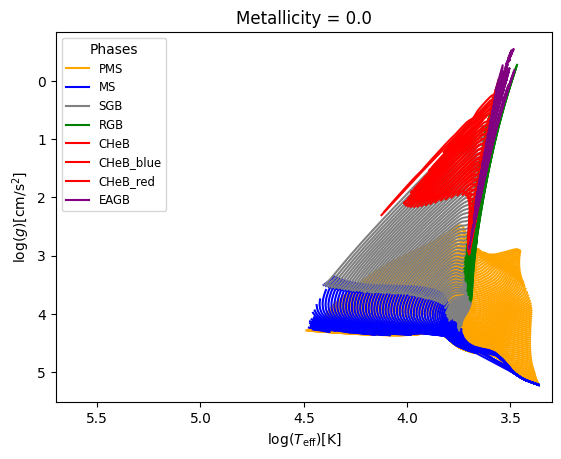

In [4]:
iso_handler = Iso_data_handler(path_to_data, 
                              ['logAge', 'logTe', 'logg', 'label', 'metallicity', 'Mass', 'Rpol'], 
                              physical_model, reclassify=True)

iso_df = iso_handler.get_isochrone_dataframe()
display(iso_df)
data_visualiser = Data_visualiser(iso_df, physical_model)
data_visualiser.plot_Kiel([], [0.0])

,logAge,logTe,logg,label,metallicity,Mass,Rpol
0,5.60000,4.4269,4.356,1.0,-0.25,9.714,3.428
1,5.65000,4.4266,4.355,1.0,-0.25,9.714,3.434
2,5.70000,4.4263,4.353,1.0,-0.25,9.714,3.440
3,5.75000,4.4061,4.358,1.0,-0.25,8.856,3.268
4,5.75000,4.4260,4.352,1.0,-0.25,9.714,3.447
...,...,...,...,...,...,...,...
499615,10.25002,3.4812,0.032,7.0,0.50,0.801,143.400
499616,10.25002,3.4776,-0.004,7.0,0.50,0.801,149.900
499617,10.25002,3.4742,-0.038,7.0,0.50,0.800,156.500
499618,10.25002,3.4701,-0.077,7.0,0.50,0.800,164.400


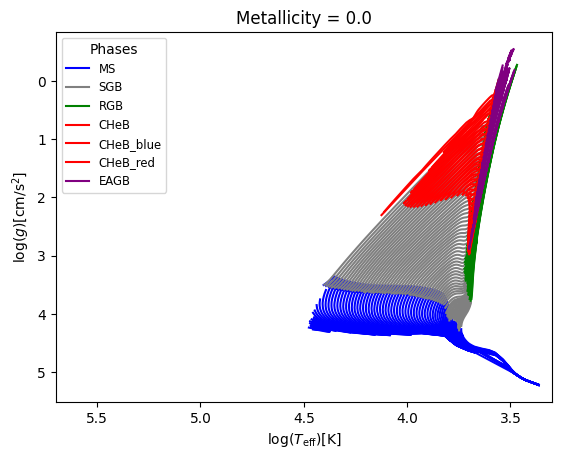

In [5]:
phase_filtered_iso_df = Data_preparator.filter_data(iso_df, {'label':[1, 2, 3, 4, 5, 6, 7, 8]})
display(phase_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(phase_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

,logAge,logTe,logg,label,metallicity,Mass,Rpol
0,7.00001,4.1038,4.432,1.0,-0.25,2.687,1.652
1,7.00001,4.1798,4.407,1.0,-0.25,3.542,1.953
2,7.00001,4.2145,4.390,1.0,-0.25,4.059,2.134
3,7.00001,4.2355,4.380,1.0,-0.25,4.400,2.249
4,7.00001,4.2442,4.372,1.0,-0.25,4.571,2.313
...,...,...,...,...,...,...,...
494738,10.25002,3.4812,0.032,7.0,0.50,0.801,143.400
494739,10.25002,3.4776,-0.004,7.0,0.50,0.801,149.900
494740,10.25002,3.4742,-0.038,7.0,0.50,0.800,156.500
494741,10.25002,3.4701,-0.077,7.0,0.50,0.800,164.400


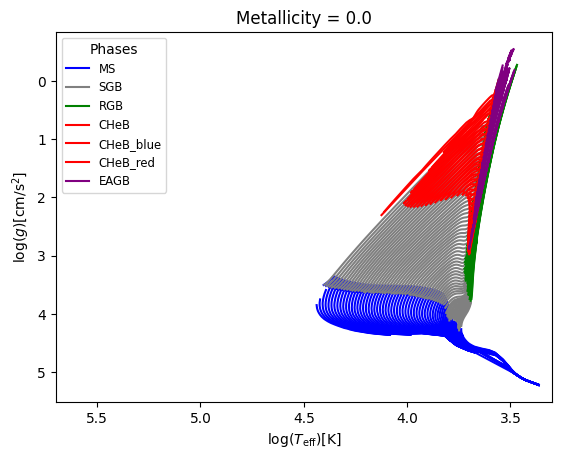

In [7]:
phase_age_filtered_iso_df = Data_preparator.filter_data(iso_df, {'label':[1, 2, 3, 4, 5, 6, 7, 8], 'logAge':(">", 7)})
display(phase_age_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(phase_age_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

In [16]:
print_all_uniques(phase_age_filtered_iso_df)

logAge  : Range : 7.0 - 10.25, Mean : 9.1928, Median : 9.4

logTe  : Range : 3.36 - 4.4935, Mean : 3.7352, Median : 3.7126

logg  : Range : -0.66 - 5.345, Mean : 2.4421, Median : 2.427

Values in label column : 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0 

Values in metallicity column : -0.25, -0.5, -0.75, -1.0, -1.25, -1.5, -1.75, -2.0, -2.25, -2.5, -2.75, 0.0, 0.25, 0.5 

Mass  : Range : 0.09 - 13.943, Mean : 2.3223, Median : 1.331

Rpol  : Range : 0.11 - 939.1, Mean : 37.2573, Median : 11.11



In [17]:
X_train, X_ivs, y_train, y_ivs = \
    Data_preparator.split_data(phase_age_filtered_iso_df, x_cols=['logAge', 'logTe', 'logg', 'metallicity'], 
                               y_cols=['Mass', 'Rpol'], random_state=12, print_stats=True)

print(X_train.shape, X_ivs.shape)
print(y_train.shape, y_ivs.shape)

Training set statistics:
Range in train data for the mass parameter : 0.09 - 13.943
Median value in train data for the mass parameter: 1.332
Mean value in train data for the mass parameter: 2.323218589057746
Range in train data for the radius parameter : 0.1056 - 939.1
Median value in train data for the radius parameter: 11.11
Mean value in train data for the radius parameter: 37.22788099213867

Testing set statistics:
Range in test data for the mass parameter : 0.09 - 13.923
Median value in test data for the mass parameter: 1.331
Mean value in test data for the mass parameter: 2.3197211487152956
Range in test data for the radius parameter : 0.1056 - 899.6
Median value in test data for the radius parameter: 11.1
Mean value in test data for the radius parameter: 37.34550756674159

(371057, 4) (123686, 4)
(371057, 2) (123686, 2)


## Model training

### Linear regression

In [18]:
lr_evaluator = Model_evaluator("linear_regression", path=path_to_results, physical_model=physical_model)


age_filtered_bigger_7 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.8191514705505896
RMSE :  1.0715266495957554
MAE :  0.7450833894081903
MedAE :  0.5515209207691789
CORR :  0.9050698705782924
MAX_ER :  5.912720576569993
Percentiles : 
  75th percentile :  0.8837507428747676
  90th percentile :  1.5588812389582276
  95th percentile :  2.2080989520118304
  99th percentile :  4.24203588594065



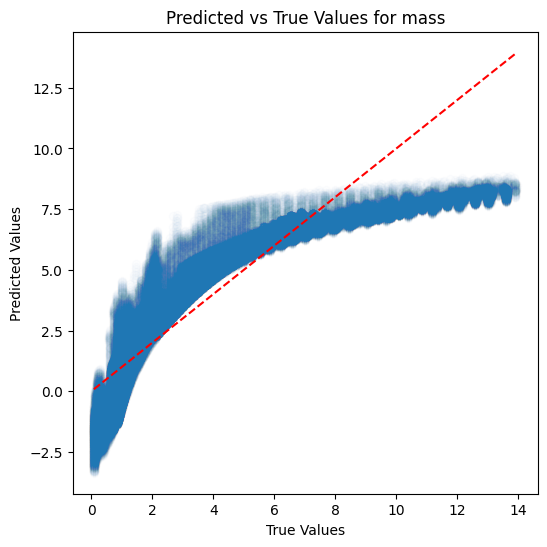

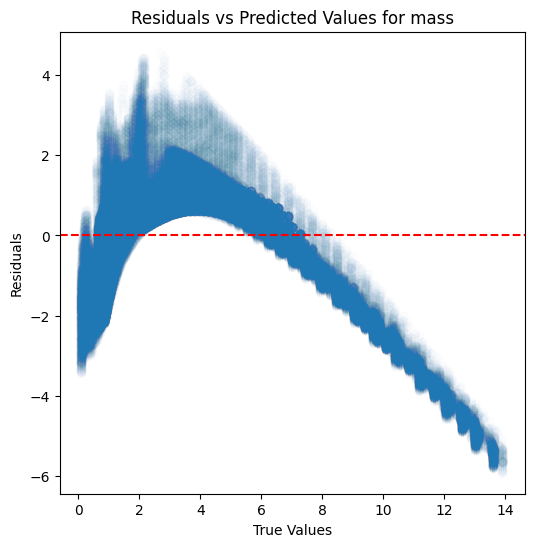

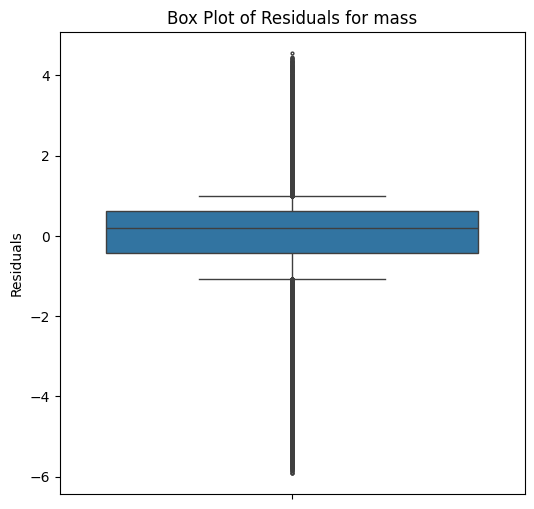

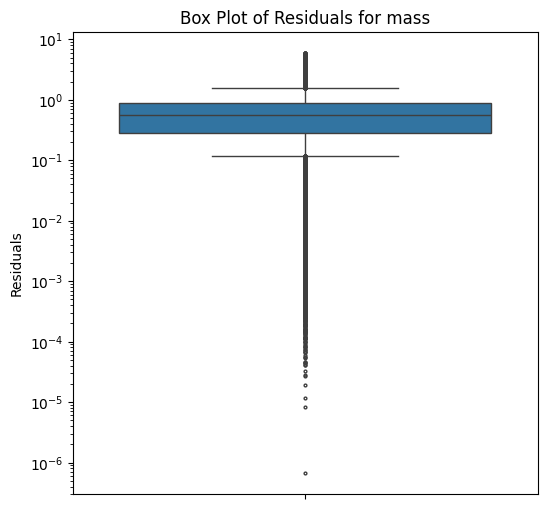

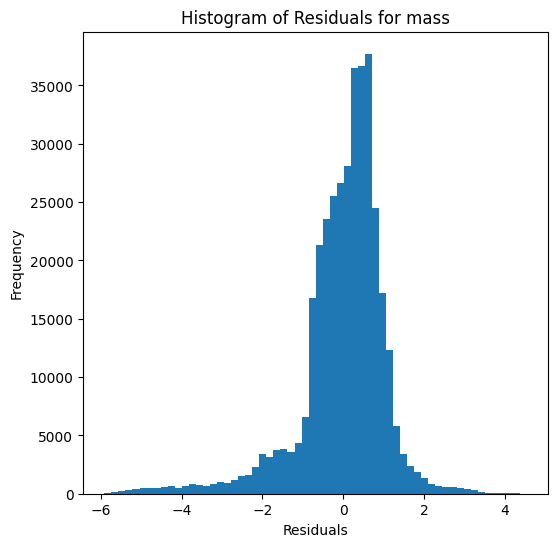

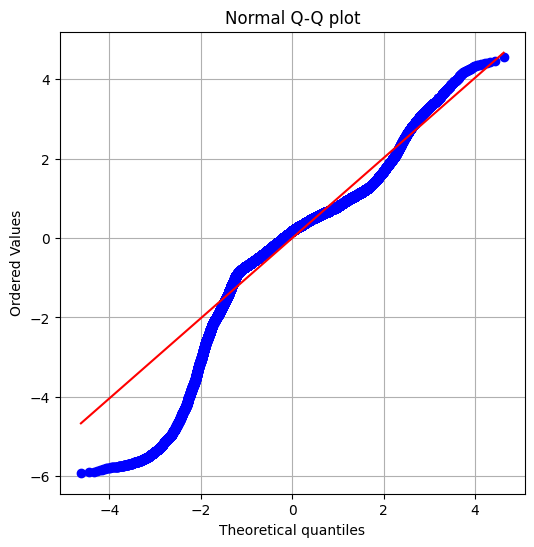


radius results:
RVE :  0.6258127946512346
RMSE :  50.16499042943461
MAE :  32.08860137370607
MedAE :  23.554059006746563
CORR :  0.7910833045434844
MAX_ER :  670.2995040071771
Percentiles : 
  75th percentile :  39.99035533544871
  90th percentile :  65.20567938613404
  95th percentile :  79.1311264422054
  99th percentile :  188.05120224084297



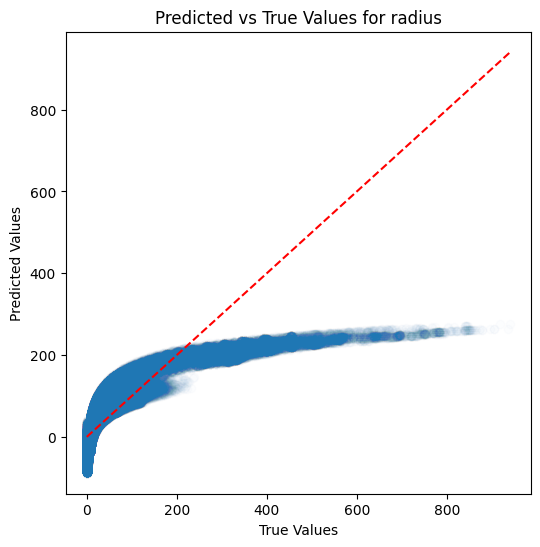

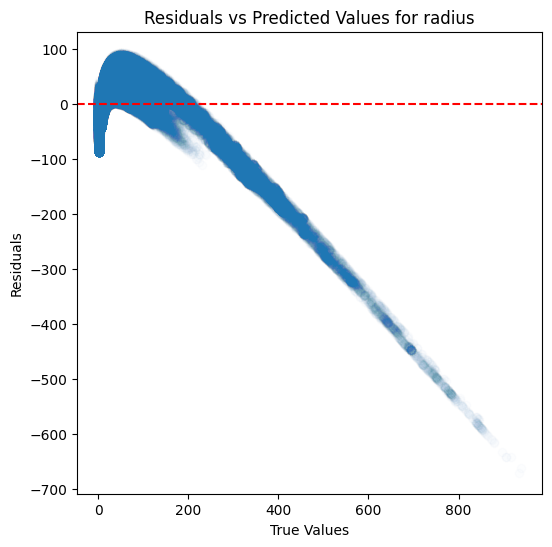

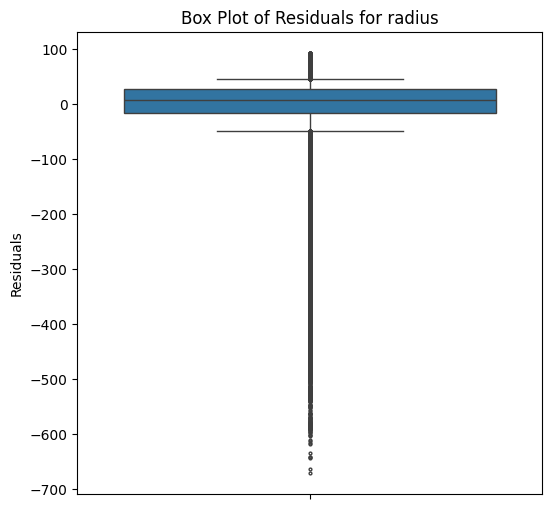

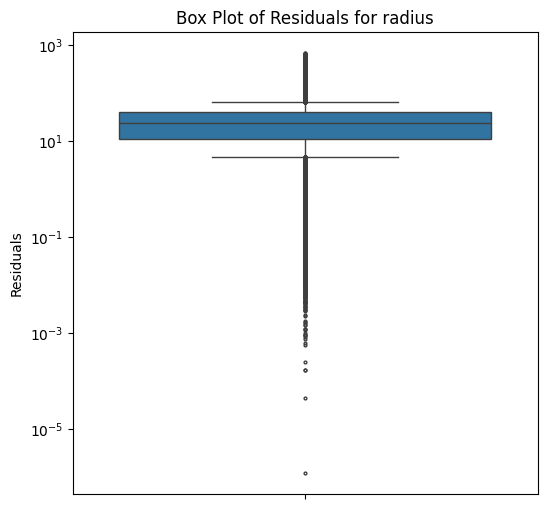

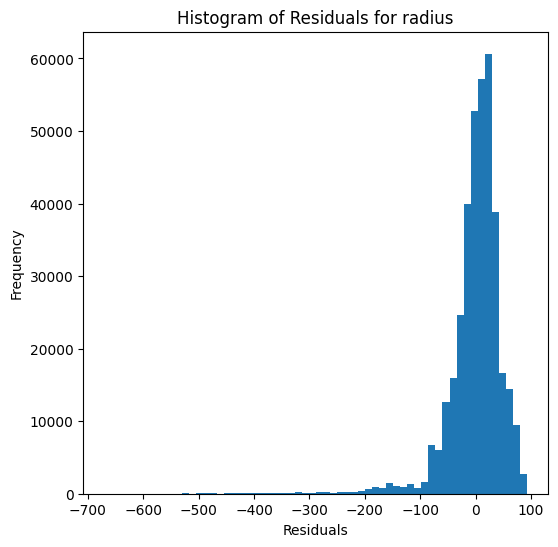

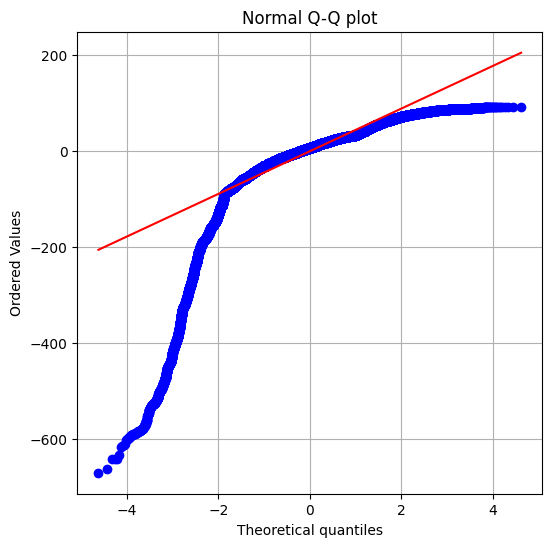

In [19]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Decision tree

In [20]:
dt_evaluator = Model_evaluator("decision_tree", path=path_to_results, physical_model=physical_model)


age_filtered_bigger_7 train data :
split 1 2 3 4 5 6 7 8 9 10 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4671: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)



mass results:
RVE :  0.9991736090555139
RMSE :  0.07243962562067008
MAE :  0.014449657564798414
MedAE :  0.0
CORR :  0.9995867202315643
MAX_ER :  3.792
Percentiles : 
  75th percentile :  4.440892098500626e-16
  90th percentile :  0.026000000000000023
  95th percentile :  0.07899999999999996
  99th percentile :  0.2909999999999999



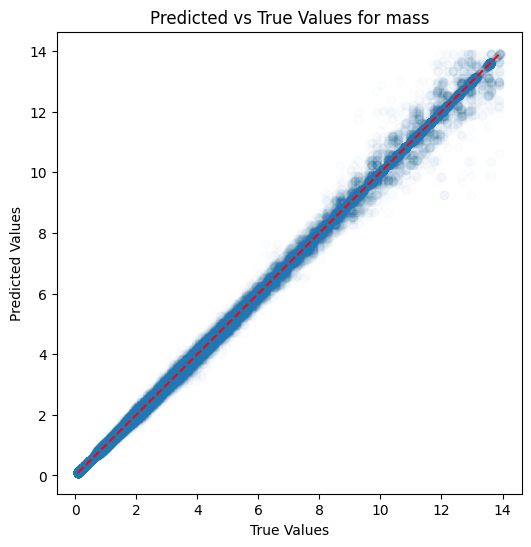

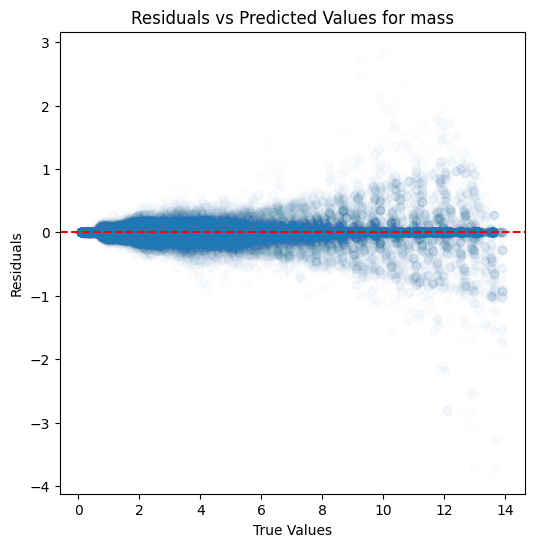

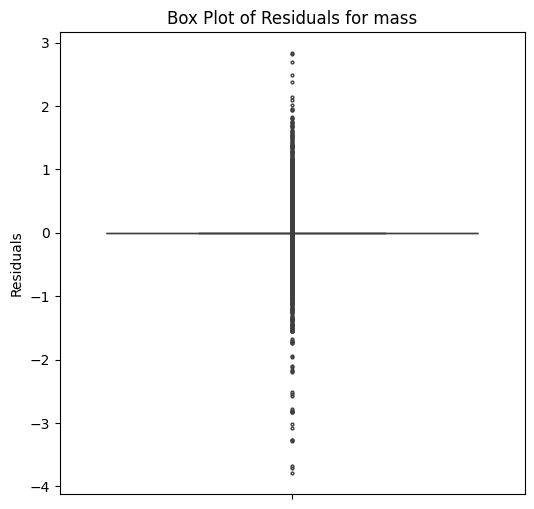

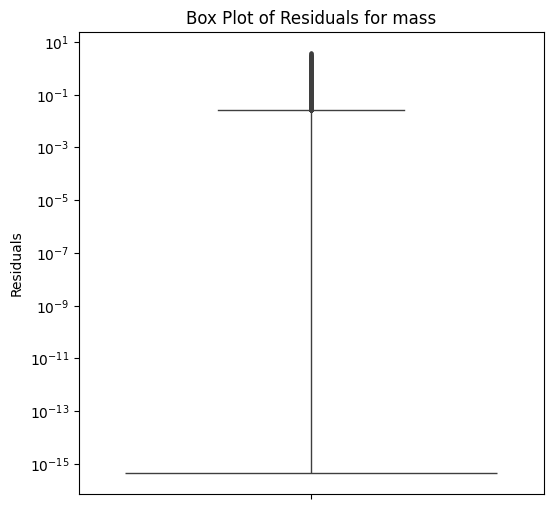

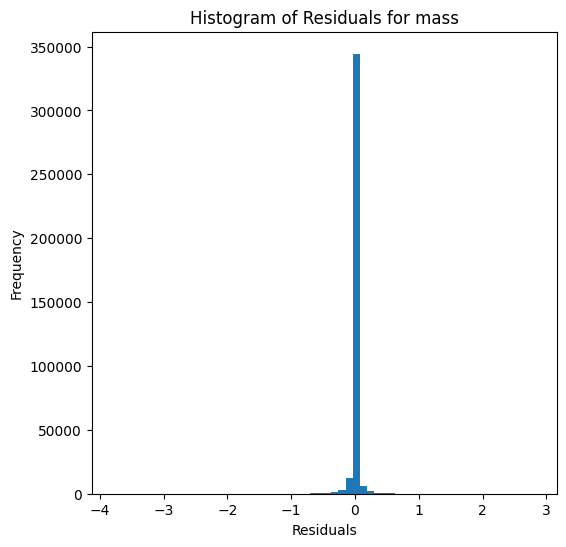

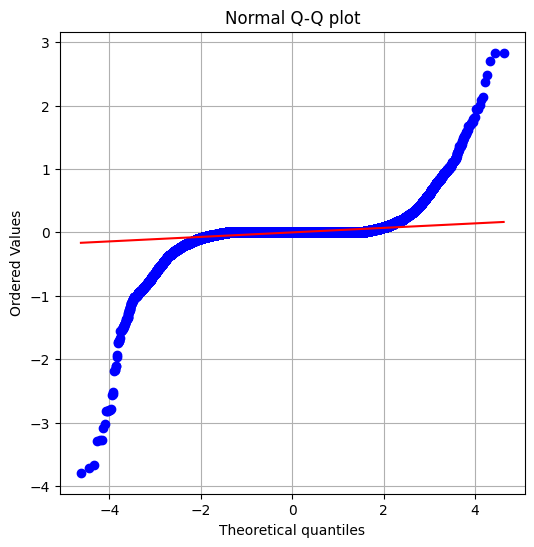

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4671: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)



radius results:
RVE :  0.9996448761987831
RMSE :  1.545448403843872
MAE :  0.22833797550260473
MedAE :  5.684341886080802e-14
CORR :  0.9998224232314812
MAX_ER :  76.9
Percentiles : 
  75th percentile :  0.009999999999999787
  90th percentile :  0.19000000000000128
  95th percentile :  0.8099999999999952
  99th percentile :  4.934400000000018



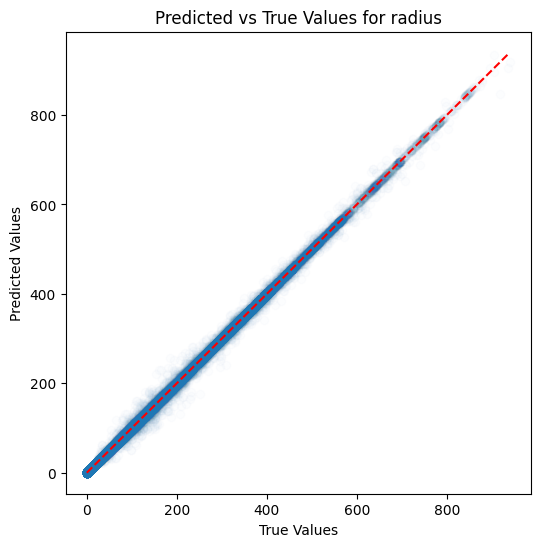

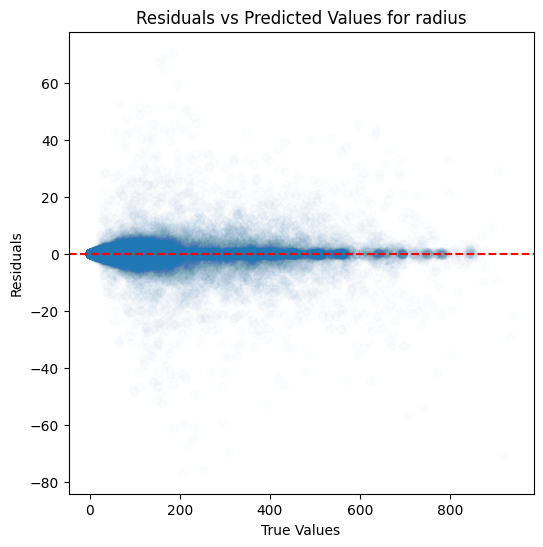

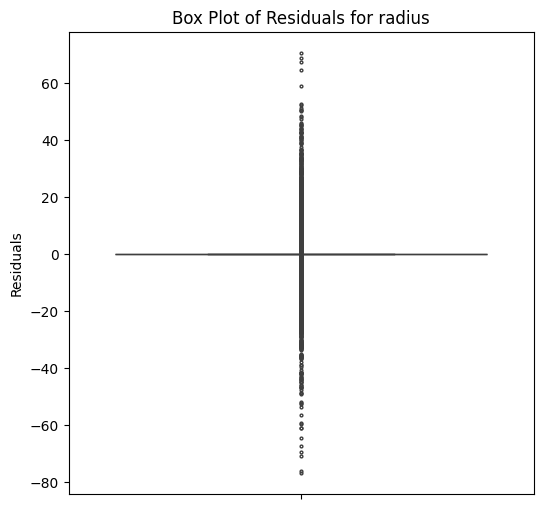

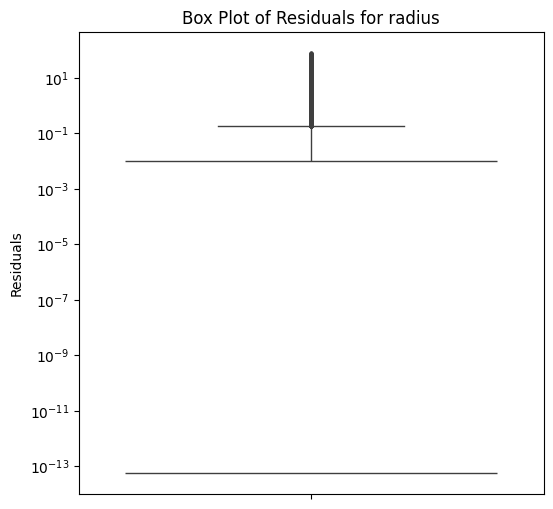

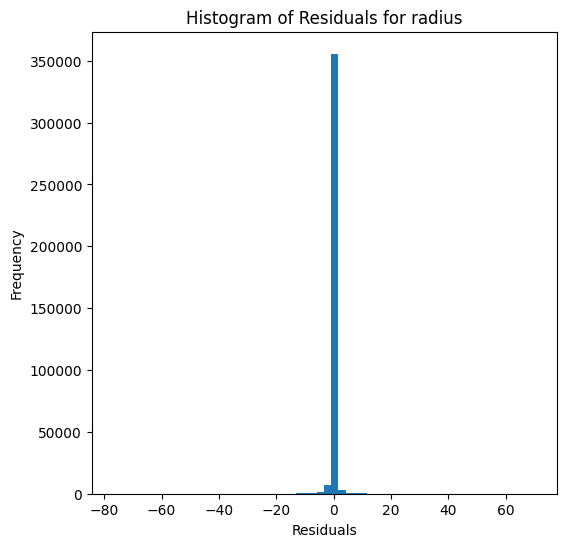

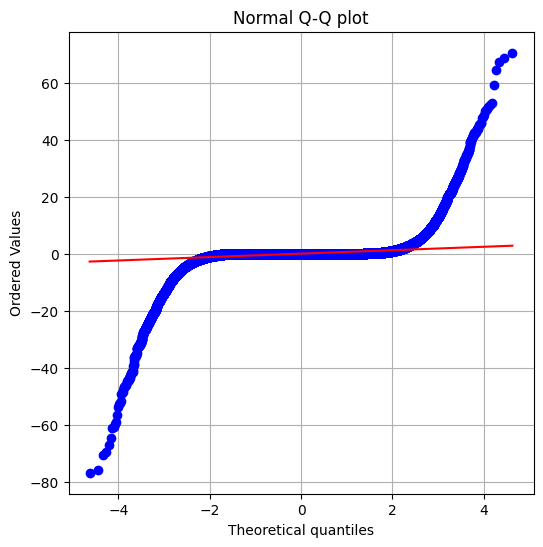

In [21]:
dt_evaluator.evaluate_Kfold_results(DecisionTreeRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### K-nearest neighbours

In [22]:
knn_evaluator = Model_evaluator("KNN", path=path_to_results, physical_model=physical_model)


age_filtered_bigger_7 train data :
split 1 2 3 4 5 6 7 8 9 10 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:4671: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)



mass results:
RVE :  0.9994056321705955
RMSE :  0.061431934567651204
MAE :  0.0198651872892844
MedAE :  0.00040000000000006697
CORR :  0.9997041550916238
MAX_ER :  1.5294000000000008
Percentiles : 
  75th percentile :  0.0129999999999999
  90th percentile :  0.058399999999999785
  95th percentile :  0.10199999999999942
  99th percentile :  0.2662880000000008



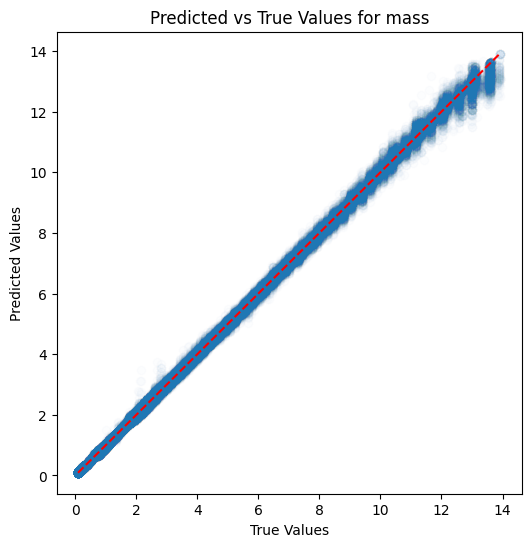

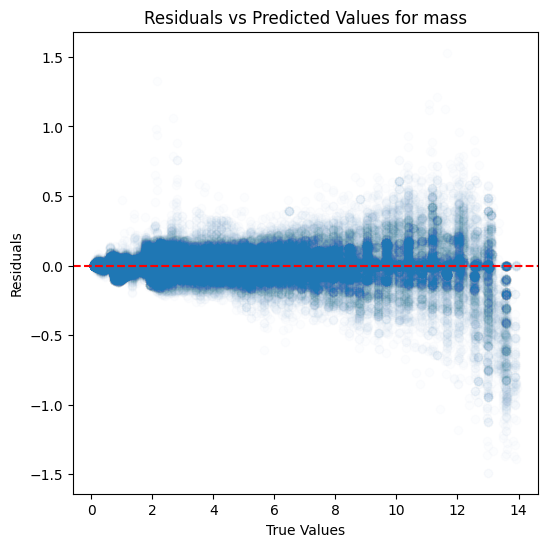

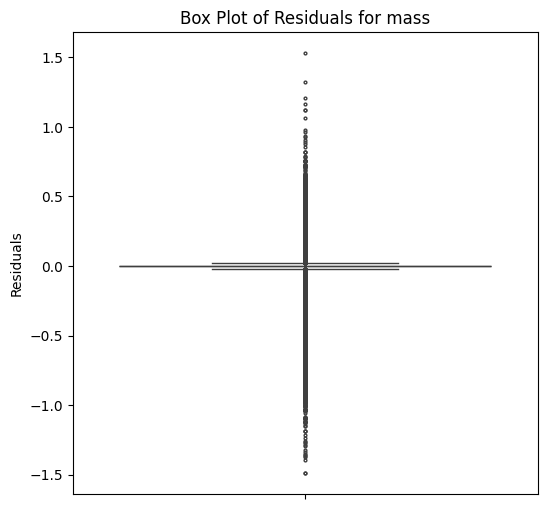

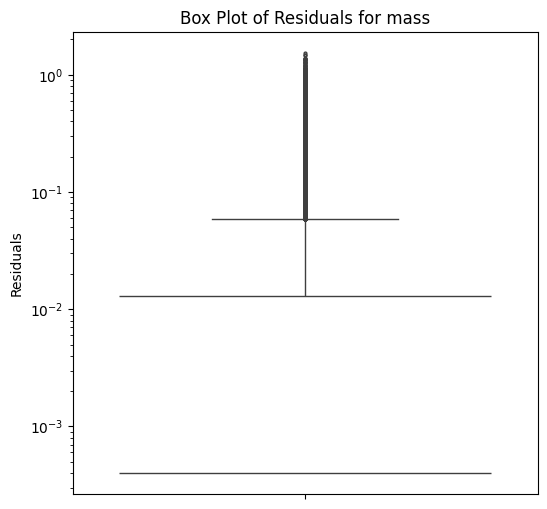

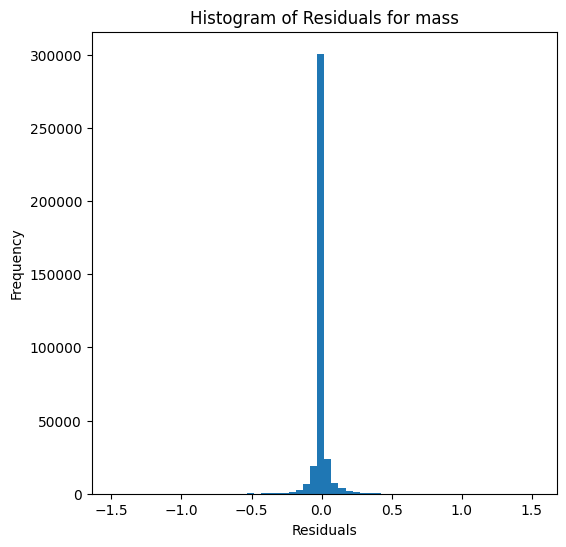

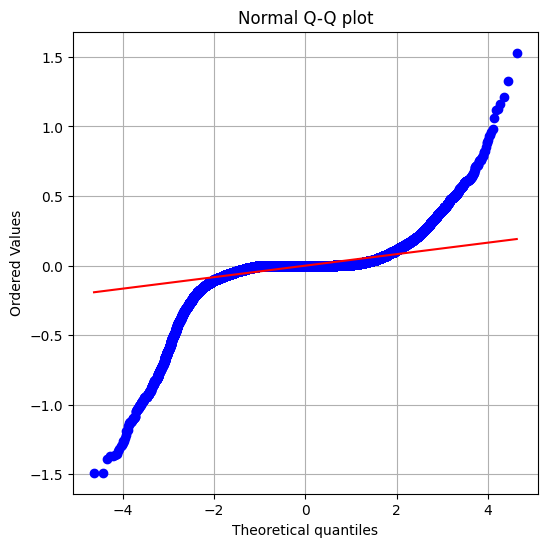


radius results:
RVE :  0.9995787603521372
RMSE :  1.6832935909426117
MAE :  0.3675385483631895
MedAE :  0.012000000000000455
CORR :  0.9997893926076269
MAX_ER :  82.13999999999999
Percentiles : 
  75th percentile :  0.1039999999999921
  90th percentile :  0.7179999999999989
  95th percentile :  1.6280000000000143
  99th percentile :  6.779999999999973



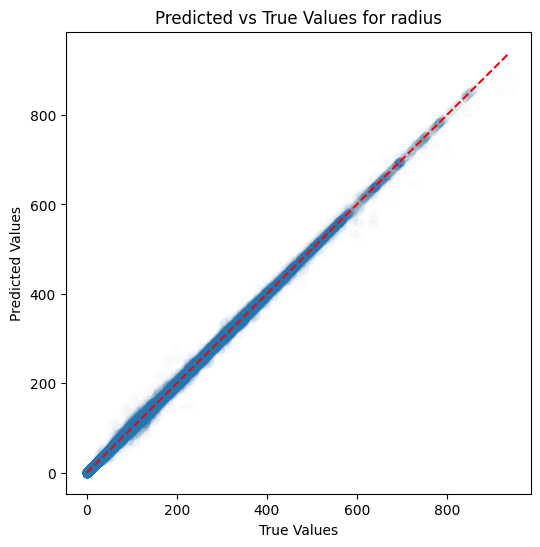

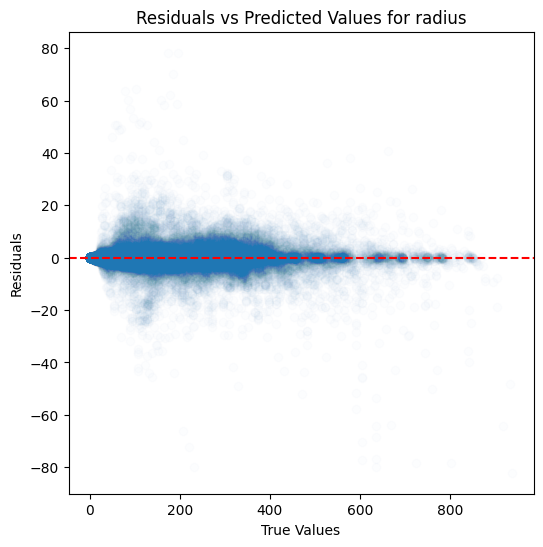

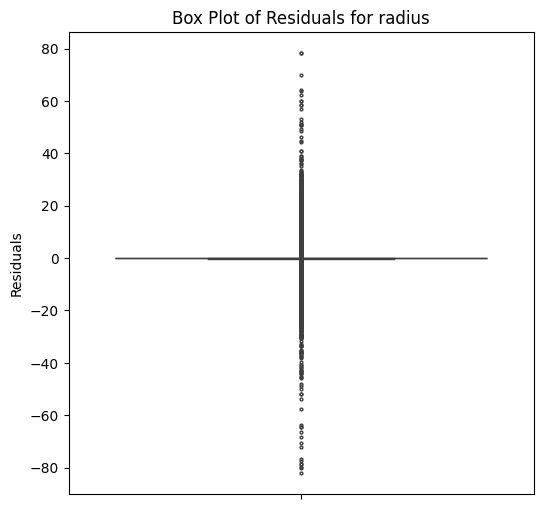

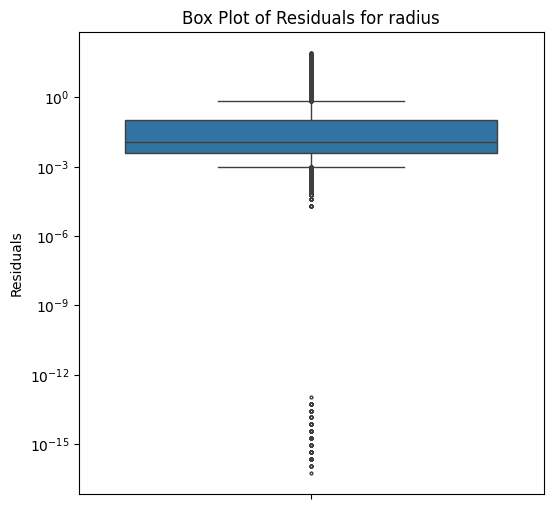

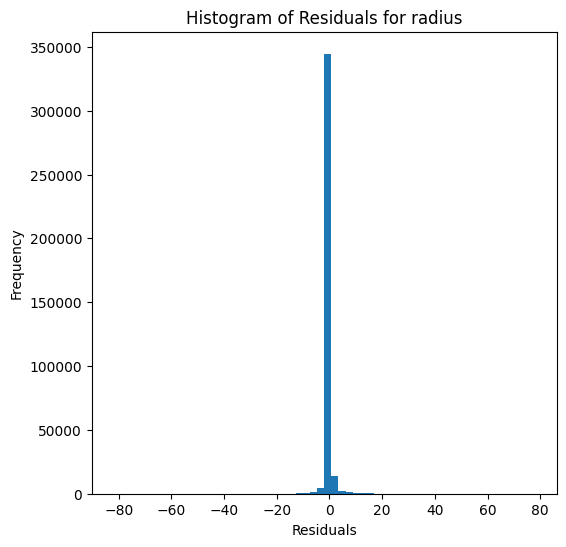

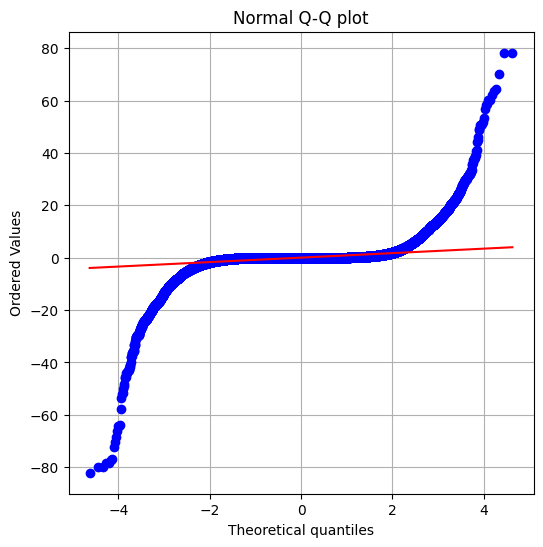

In [23]:
knn_evaluator.evaluate_Kfold_results(KNeighborsRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Random forests

In [24]:
rf_evaluator = Model_evaluator("random_forest", path=path_to_results, physical_model=physical_model)


age_filtered_bigger_7 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9997041252355282
RMSE :  0.04335851032346775
MAE :  0.009863555925751217
MedAE :  0.00010999999998873022
CORR :  0.9998523174856581
MAX_ER :  2.415719999999995
Percentiles : 
  75th percentile :  0.0022100000000011555
  90th percentile :  0.019989999999996753
  95th percentile :  0.05061000000000675
  99th percentile :  0.17418880000000103



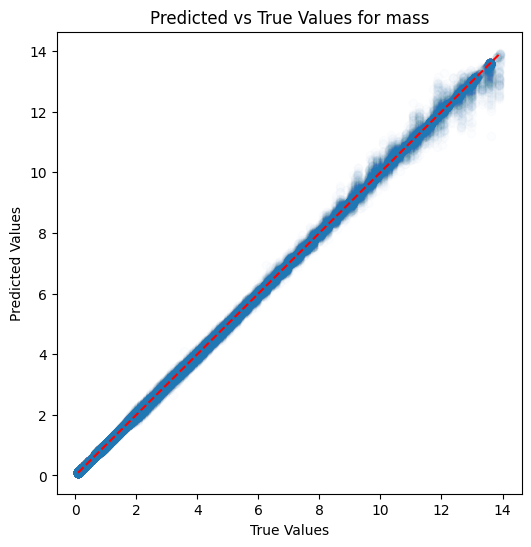

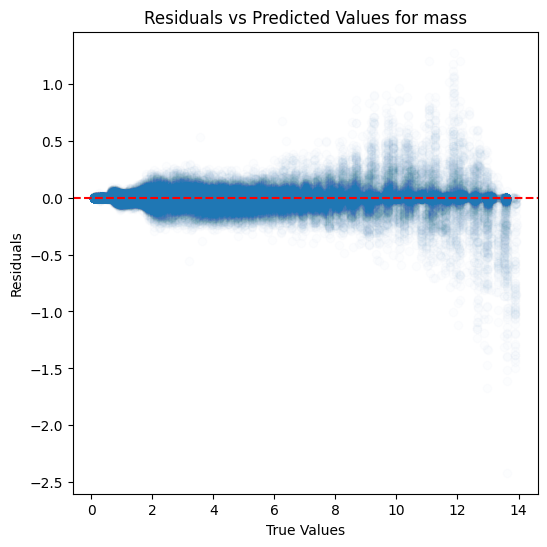

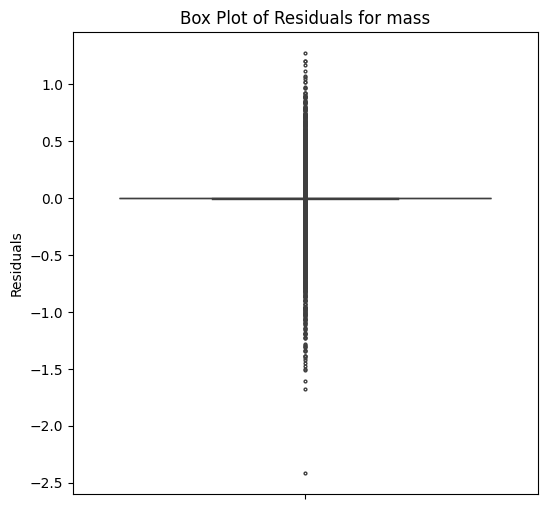

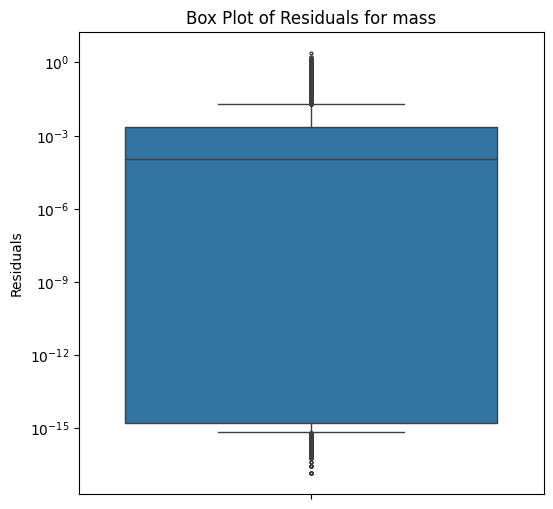

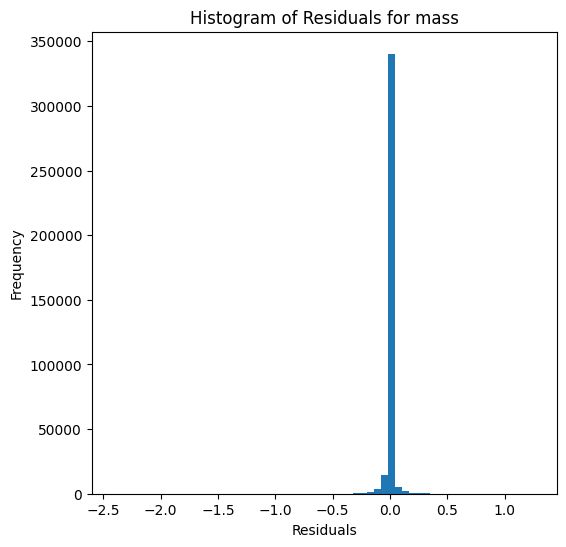

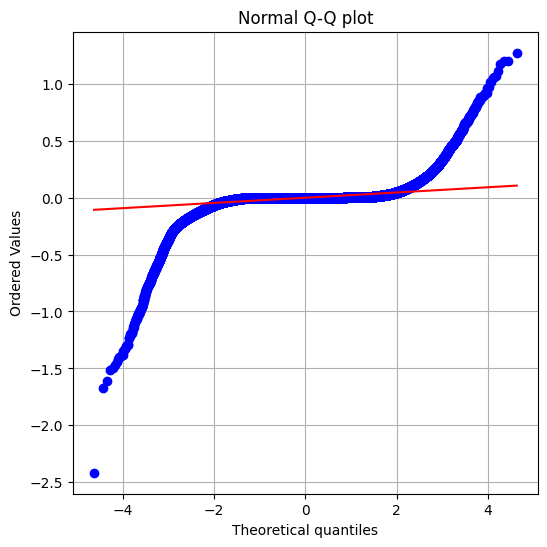


radius results:
RVE :  0.9998136243167953
RMSE :  1.1196058967232023
MAE :  0.16419593310801175
MedAE :  0.003199999999957015
CORR :  0.9999068112409745
MAX_ER :  73.76969999999989
Percentiles : 
  75th percentile :  0.01479999999996906
  90th percentile :  0.1420000000000286
  95th percentile :  0.5535000000000053
  99th percentile :  3.5484400000001597



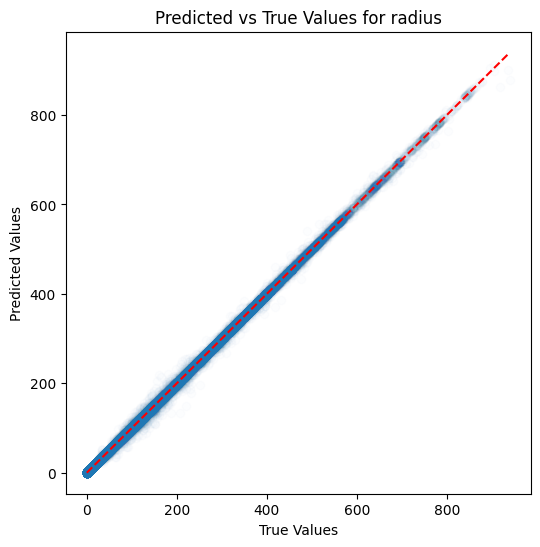

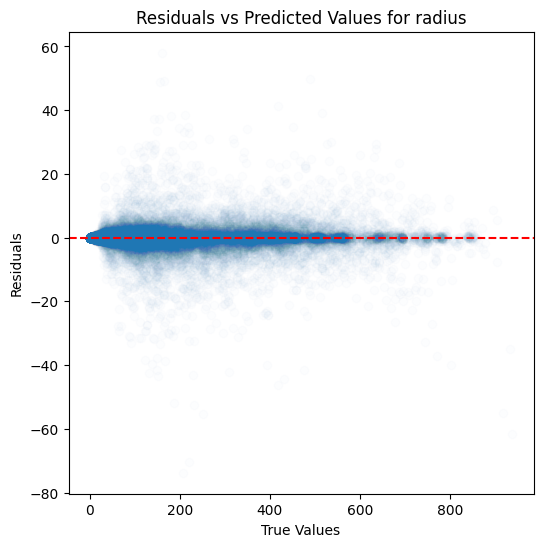

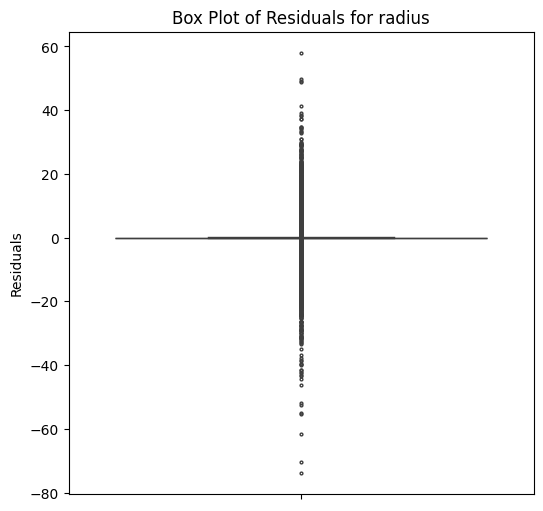

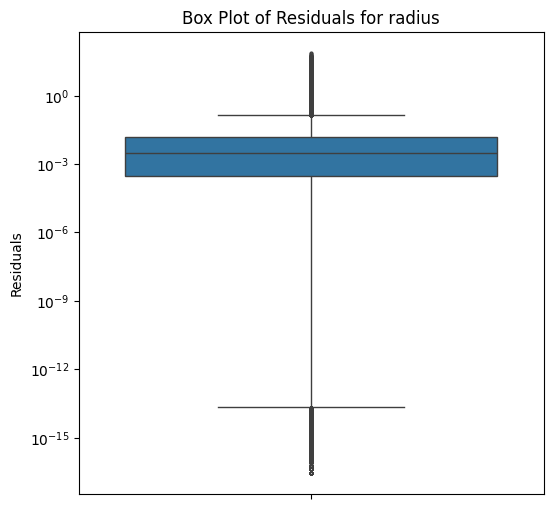

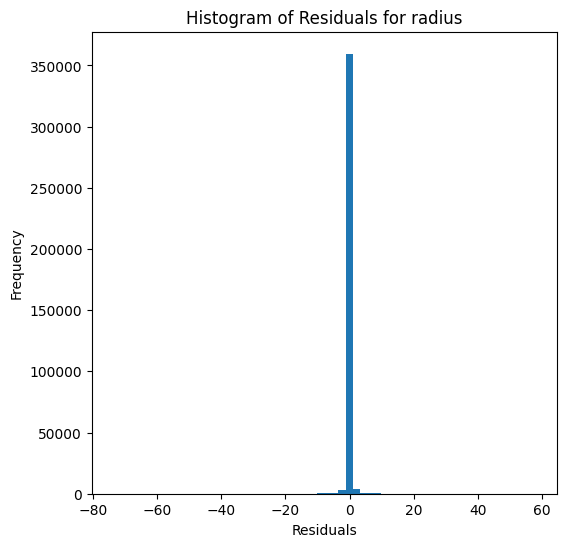

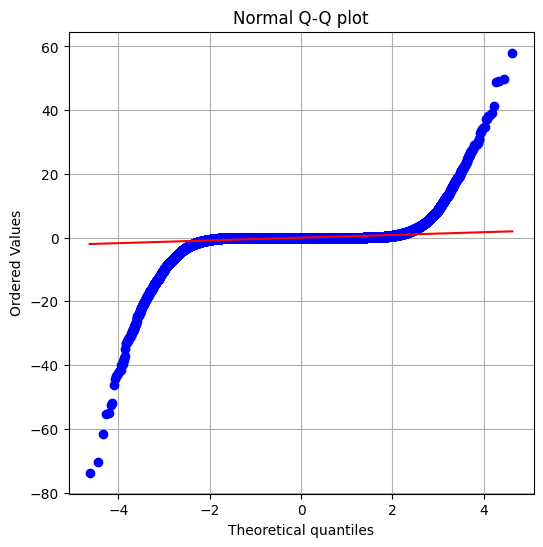

In [25]:
rf_evaluator.evaluate_Kfold_results(RandomForestRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### XGBoost

In [26]:
xgb_evaluator = Model_evaluator("xgboost", path=path_to_results, physical_model=physical_model)


age_filtered_bigger_7 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9997765935230742
RMSE :  0.03766118134073482
MAE :  0.018082965064854573
MedAE :  0.0061800794601440945
CORR :  0.9998882946132611
MAX_ER :  0.9380154876708993
Percentiles : 
  75th percentile :  0.01953331279754633
  90th percentile :  0.04783195495605473
  95th percentile :  0.07468598327636725
  99th percentile :  0.16032330474853537



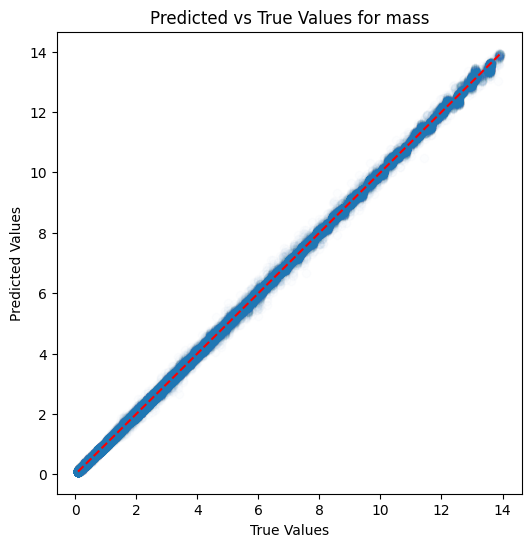

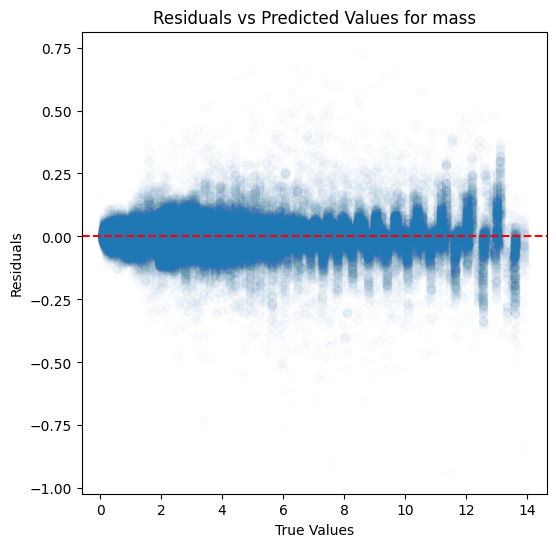

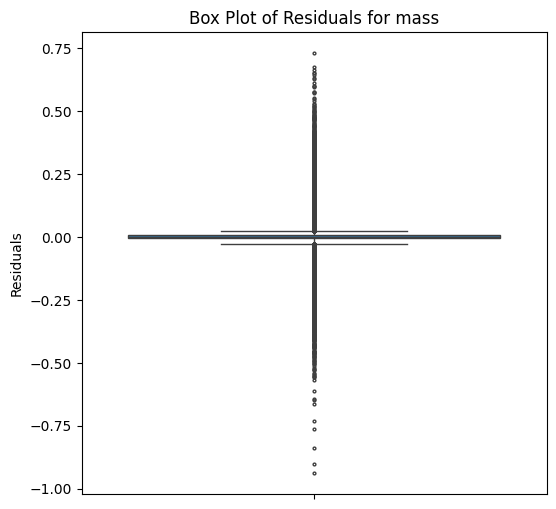

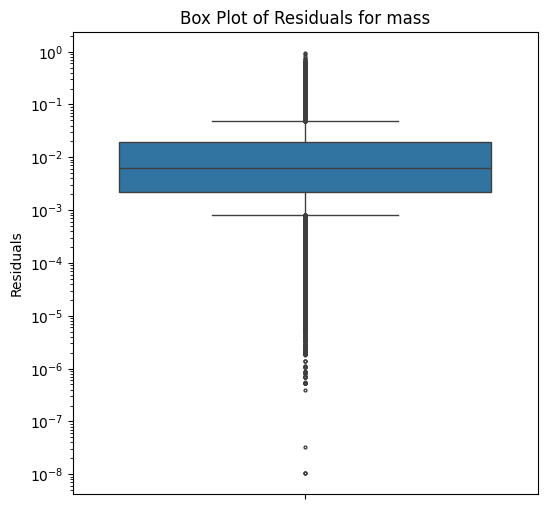

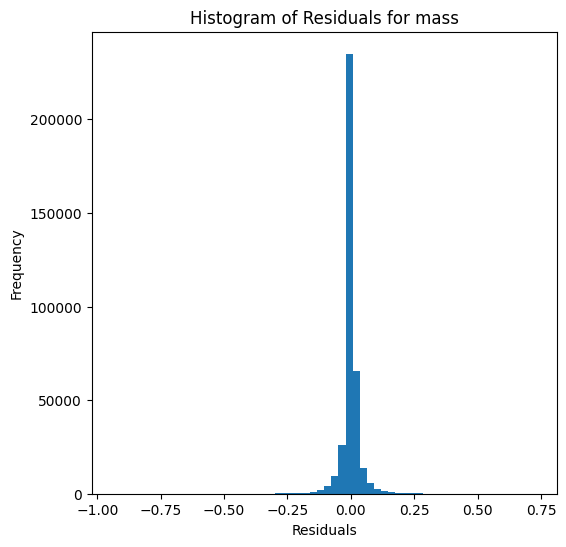

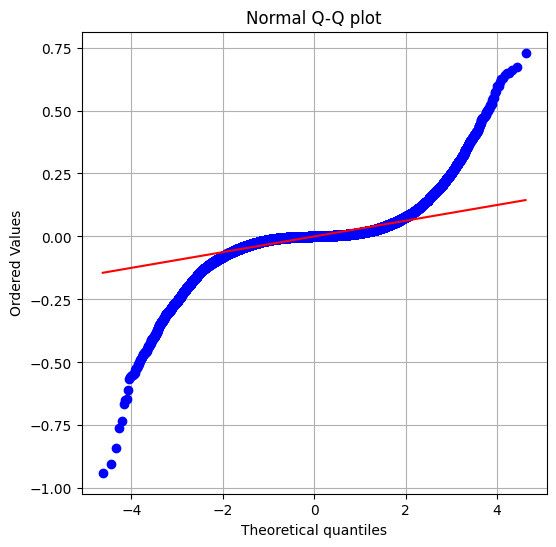


radius results:
RVE :  0.9992925857507095
RMSE :  2.181188899863599
MAE :  0.6511523705037109
MedAE :  0.13542152404785135
CORR :  0.9996462318449655
MAX_ER :  146.77166748046875
Percentiles : 
  75th percentile :  0.3616836166381834
  90th percentile :  1.44311164855957
  95th percentile :  2.9012120971679747
  99th percentile :  9.18221826171876



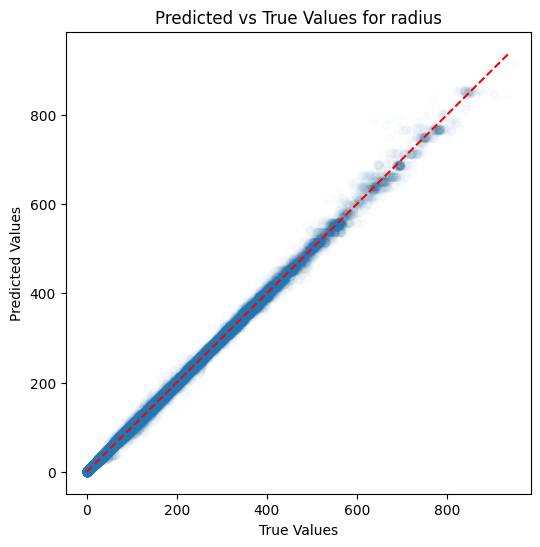

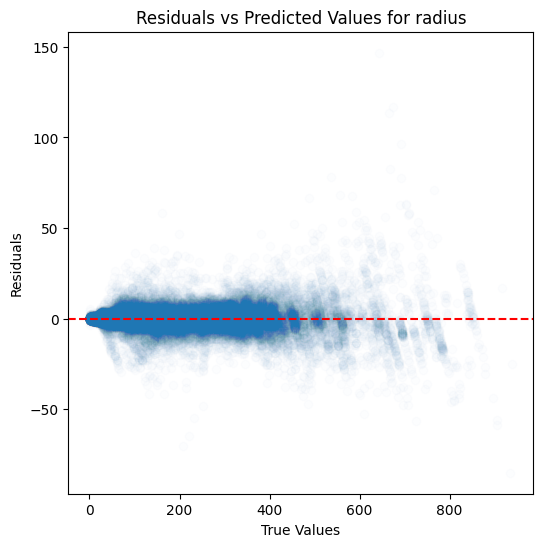

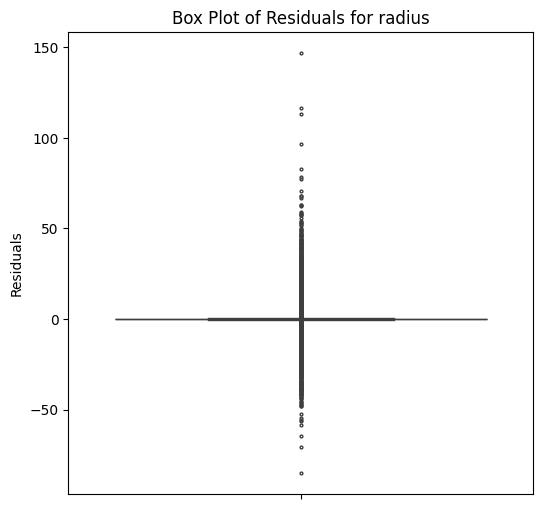

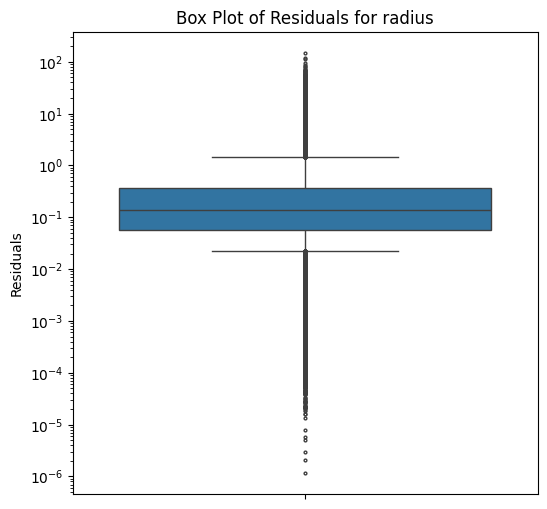

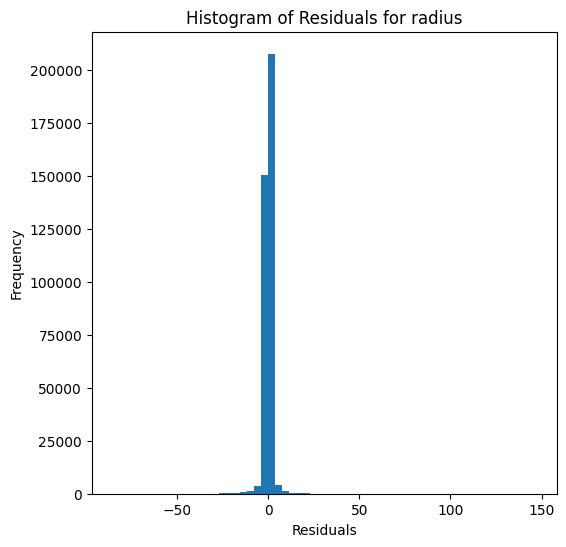

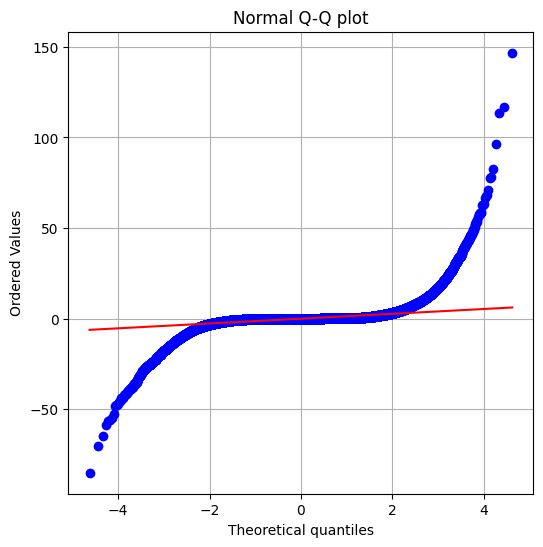

In [27]:
xgb_evaluator.evaluate_Kfold_results(XGBRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### Multi-layer perceptron

In [28]:
mlp_evaluator = Model_evaluator("mlp", path=path_to_results, physical_model=physical_model)


age_filtered_bigger_7 train data :
split 1 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


1.4955227226801282
2 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


1.472117432887087
3 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


1.612421482367605
4 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


1.677706727088896
5 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


1.6069968910557353

mass results:
RVE :  0.9890722871192252
RMSE :  0.2634614423992595
MAE :  0.16902818551976587
MedAE :  0.1083403244040273
CORR :  0.9945753132362
MAX_ER :  2.5933131687857855
Percentiles : 
  75th percentile :  0.19656323110149776
  90th percentile :  0.36680187405577713
  95th percentile :  0.5678858224266877
  99th percentile :  1.0558568637326344



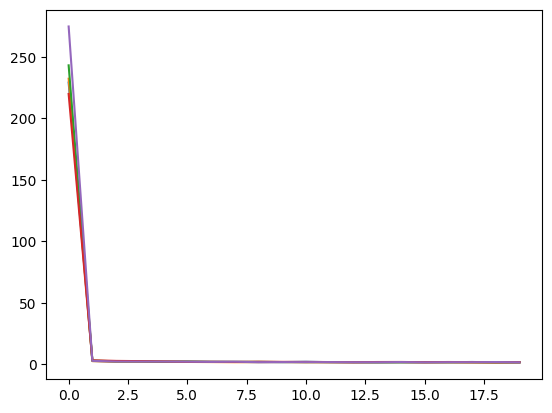

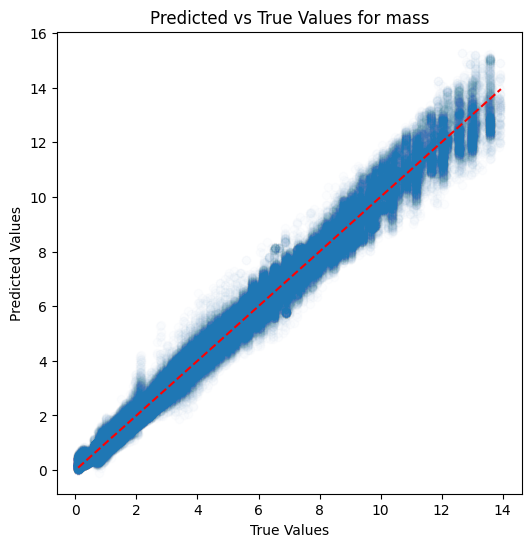

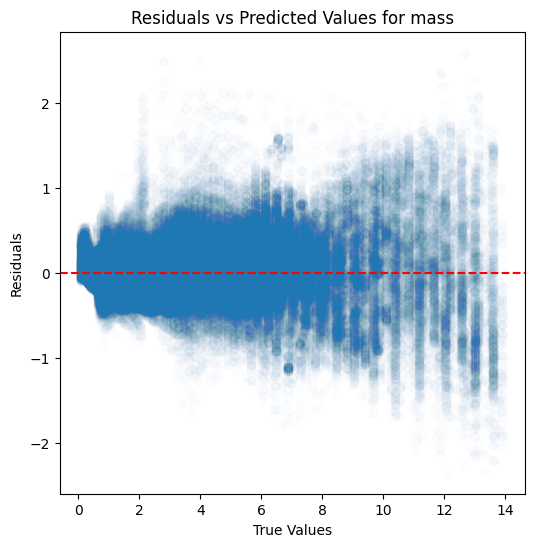

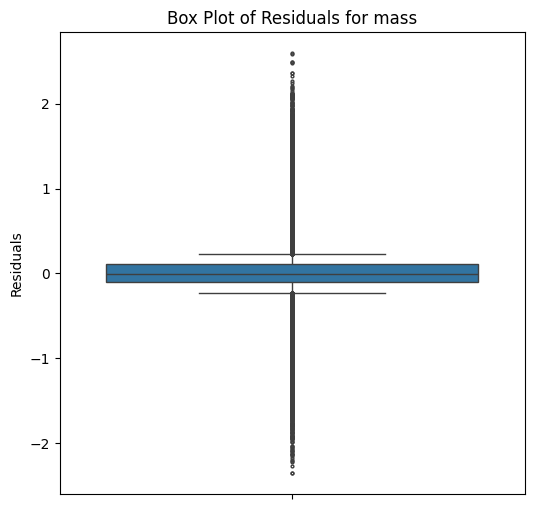

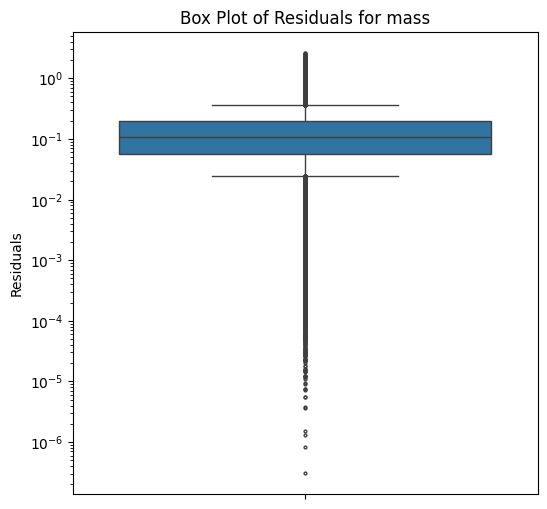

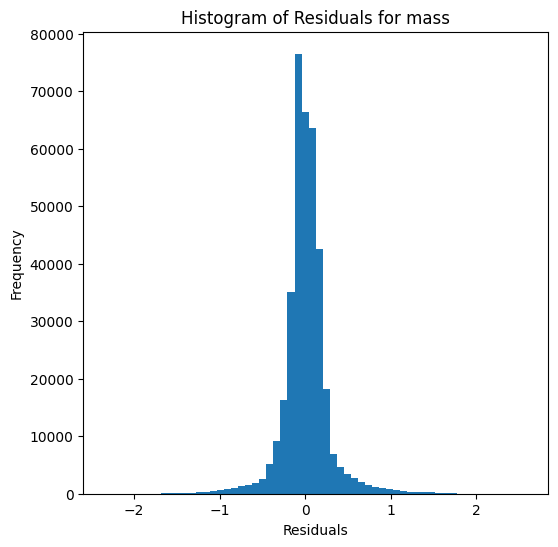

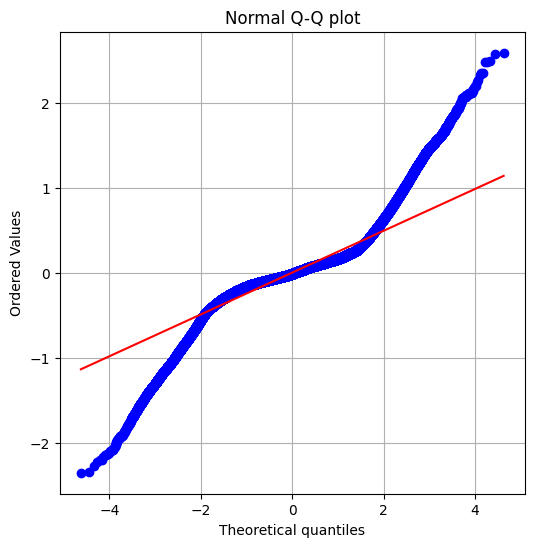


radius results:
RVE :  0.998119585542027
RMSE :  3.567645717556396
MAE :  1.2962450736043554
MedAE :  0.48233463058656945
CORR :  0.999073537305583
MAX_ER :  101.49757239564588
Percentiles : 
  75th percentile :  0.8106125606932331
  90th percentile :  2.3954005236577682
  95th percentile :  5.311956043683276
  99th percentile :  17.488253836410415



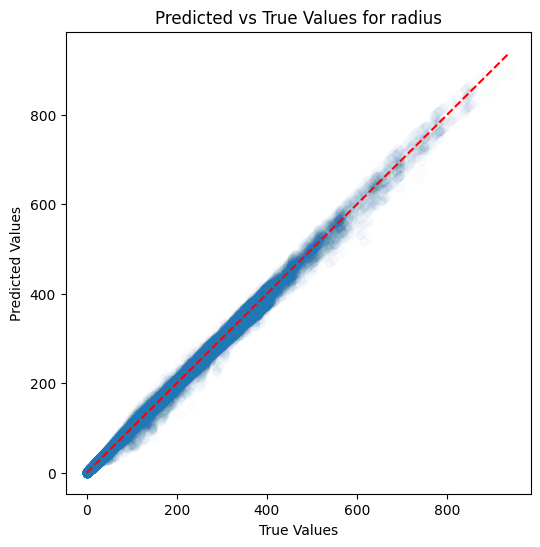

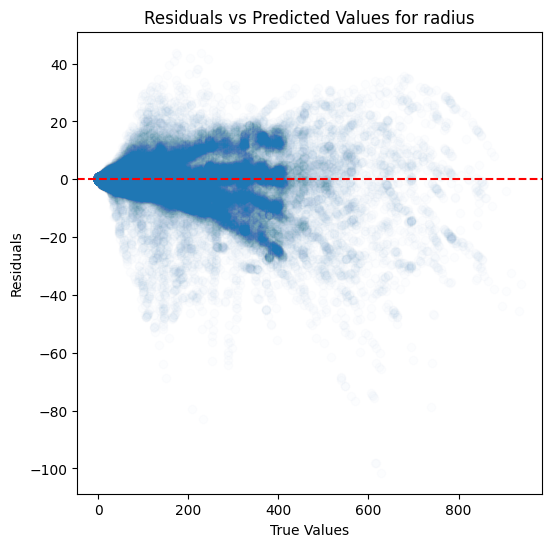

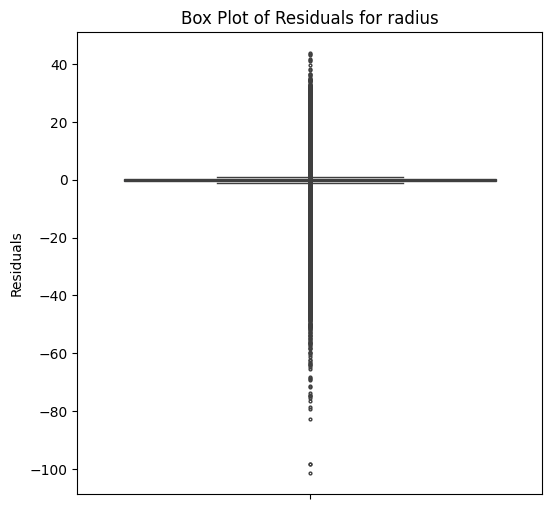

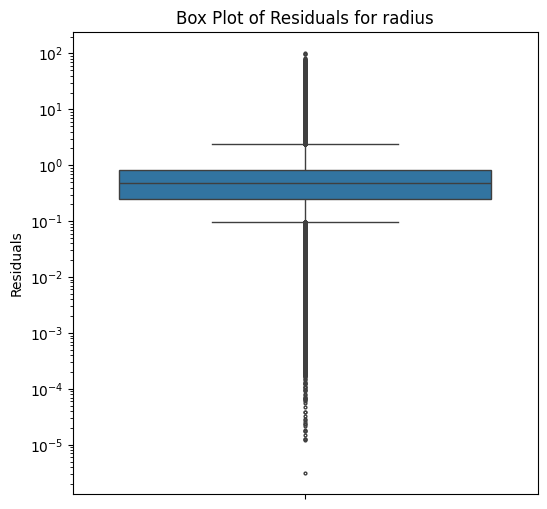

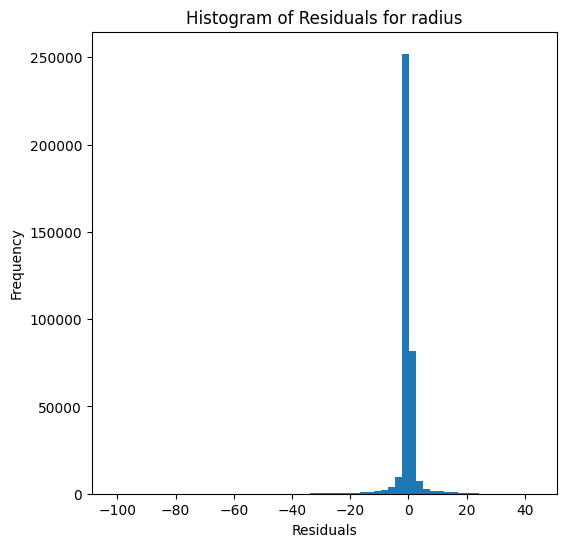

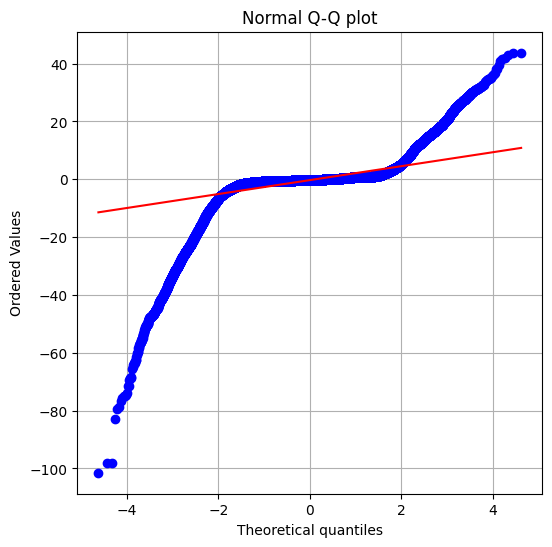

In [29]:
mlp_evaluator.evaluate_Kfold_results(MLPRegressor, X_train, y_train, path_to_predictions, tag, n_splits=5, random_state=12, override=True, use_preds=False, hidden_layer_sizes = (100, 100, 100, 100), max_iter=20, batch_size=400) #, override=False, use_preds=True)